### Single Feature Linear Regression vs Multiple Linear Regression

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
# View first few rows
tennis= pd.read_csv('tennis_stats.csv')
# View first few rows
print(tennis.head())
# View first few columns
print(tennis.columns)
# Get summary information about the dataset
print(tennis.info())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

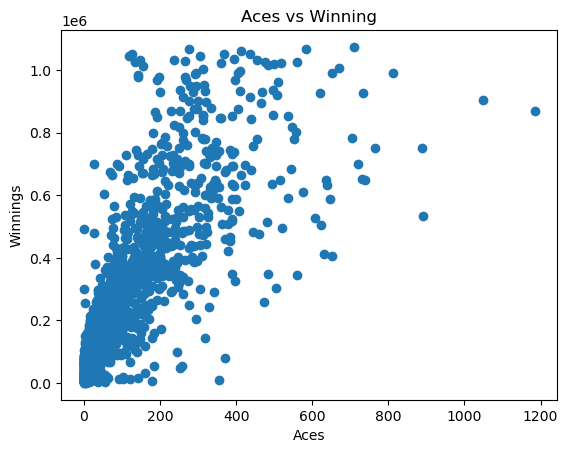

Conclusion: Aces are a strong predictor of winnings.


In [129]:
plt.scatter(tennis['Aces'], tennis['Winnings'])
plt.xlabel('Aces')
plt.ylabel('Winnings')
plt.title('Aces vs Winning')
plt.show()
print("Conclusion: Aces are a strong predictor of winnings." )

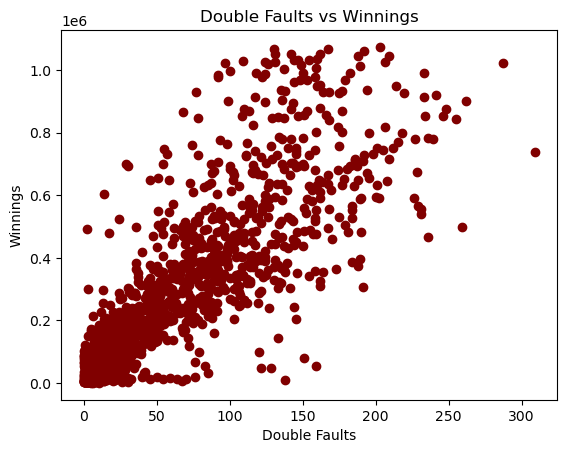

Conclusion: Double faults alone are not a good predictor


In [130]:
# Double Faults vs Winnings
plt.scatter(tennis['DoubleFaults'], tennis['Winnings'], color="maroon")
plt.xlabel('Double Faults')
plt.ylabel('Winnings')
plt.title('Double Faults vs Winnings')
plt.show()
print("Conclusion: Double faults alone are not a good predictor")

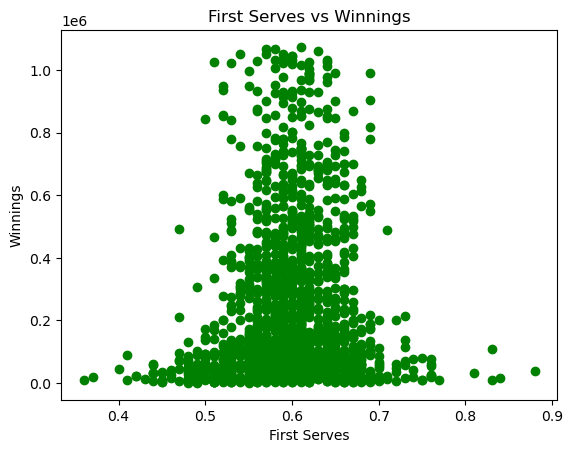

In [131]:
plt.scatter(tennis["FirstServe"], tennis["Winnings"], color='green')
plt.xlabel("First Serves")
plt.ylabel("Winnings")
plt.title("First Serves vs Winnings")
plt.show()

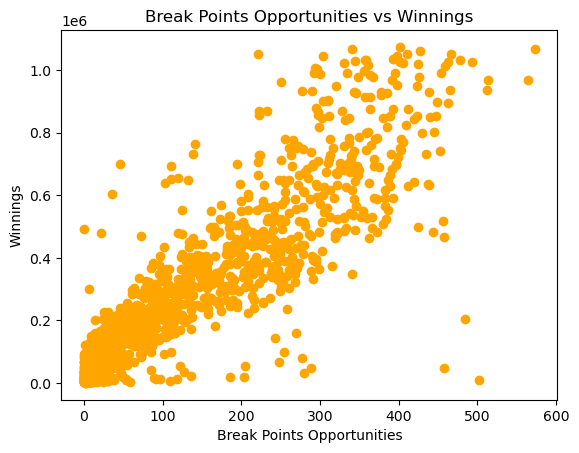

Aggressive play and pressure creation matter


In [132]:
plt.scatter(tennis["BreakPointsOpportunities"], tennis["Winnings"], color='orange')
plt.xlabel("Break Points Opportunities")
plt.ylabel("Winnings")
plt.title("Break Points Opportunities vs Winnings")
plt.show()
print("Aggressive play and pressure creation matter")

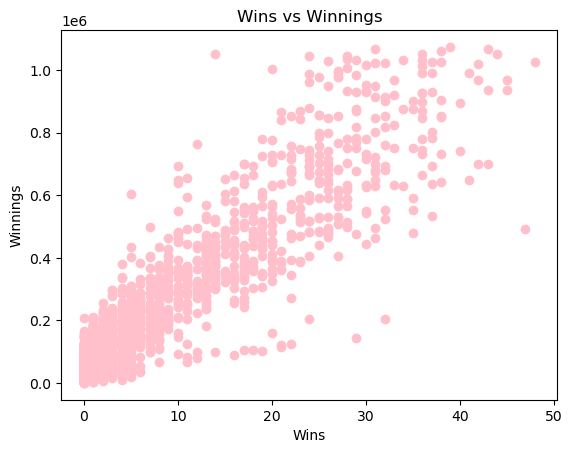

Wins are one of the strongest predictors


In [133]:
plt.scatter(tennis["Wins"], tennis["Winnings"], color='pink')
plt.xlabel("Wins")
plt.ylabel("Winnings")
plt.title("Wins vs Winnings")
plt.show()
print("Wins are one of the strongest predictors")

### Exploratory Data Analysis

From the visualizations, we observe that features such as Aces, Wins, and Break Point Opportunities show a positive relationship with player winnings. Players who serve more aces and win more matches tend to earn higher prize money.
### Exploratory Data Analysis Observations

From the visualizations, Double Faults show a clear and fairly linear relationship with player winnings. This is likely because higher-ranked players participate in more matches, resulting in both higher winnings and more opportunities for double faults. In contrast, First Serve Percentage does not display a strong linear trend with winnings, as players with similar first serve percentages exhibit a wide range of earnings. Therefore, Double Faults may be a useful predictor in a linear regression model, while First Serve Percentage may be less effective on its own.



In [134]:
X= tennis[['BreakPointsOpportunities']]
y= tennis[['Winnings']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error: 12619219445.274075
R2 Score:  0.7865551696389493


Using Break Points Opportunities as the predictor resulted in a high R² score. This is because this feature is strongly correlated with match volume and success, which in turn directly affects prize money. Although it is not an explicit outcome variable, it acts as a proxy for performance outcomes, leading to a strong predictive relationship.

In [135]:
X= tennis[['Aces']]
y= tennis[['Winnings']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error: 24026981700.006477
R2 Score:  0.5936012480576552


This model used Aces as the predictor and achieved an R² score of approximately 0.59, indicating that serving strength plays a significant role in determining a player’s success. Players who serve more aces are often able to dominate service games and advance further in tournaments, resulting in higher prize money.

### Two Feature Linear Regression

Mean Squared Error: 12456944318.205269
R2 Score:  0.7892999342513114


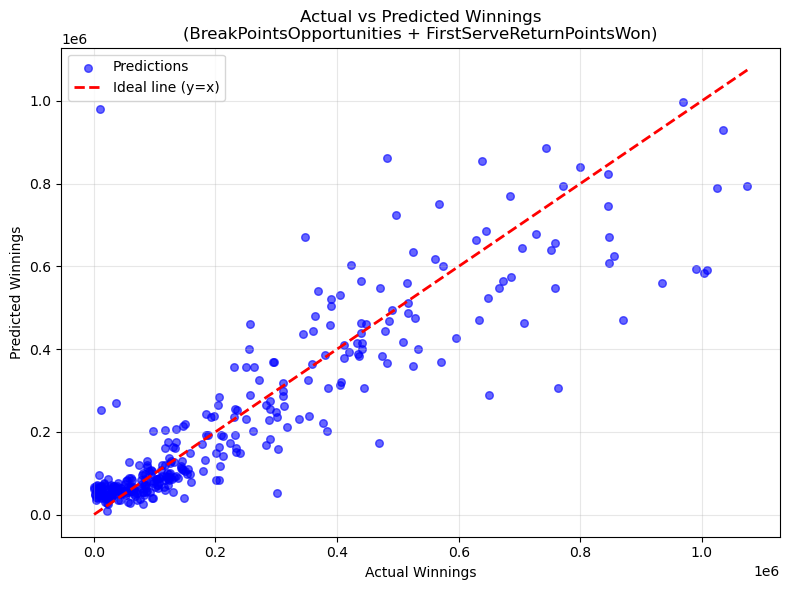

In [136]:
X= tennis[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
y= tennis[['Winnings']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', s=30, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal line (y=x)')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings\n(BreakPointsOpportunities + FirstServeReturnPointsWon)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Multi- feature Linear Regression

Mean Squared Error: 10239044220.288748
R2 Score:  0.8268140857573174


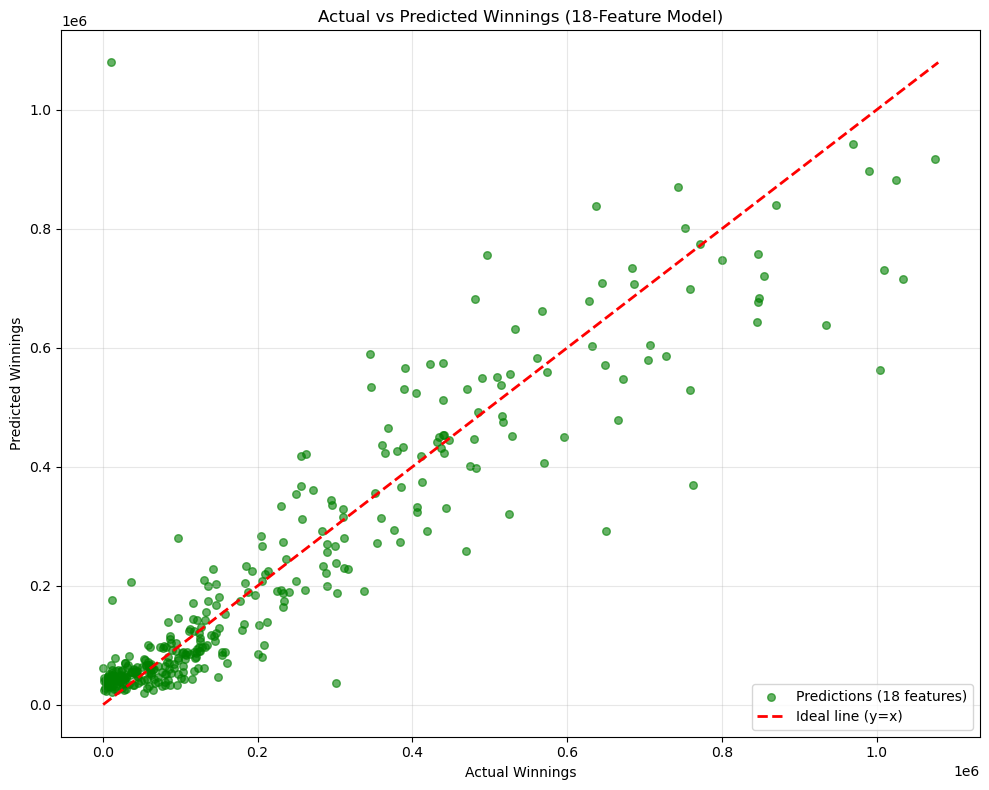

In [137]:
X = tennis[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
           'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
           'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
           'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
           'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
           'TotalServicePointsWon']]

y = tennis['Winnings'].squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', s=30, label='Predictions (18 features)')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal line (y=x)')

plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings (18-Feature Model)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
